In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
#Import Random Forest from scratch functions
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/TreeModelsFromScratch")

from DecisionTree import DecisionTree
from RandomForest import RandomForest

In [5]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Data

In [89]:
# Load data
data = datasets.load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [90]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

# Decision Tree from Scratch

In [92]:
# Train DecisionTree from scratch
clf_tree = DecisionTree(max_depth=10, k=1, treetype="classification", HS_lambda=10, HShrinkage=True, random_state=42)
clf_tree.fit(X_train.values, y_train)

# Predict
predictions = clf_tree.predict(X_test)

In [93]:
acc = accuracy(y_test, predictions)
acc

0.9122807017543859

In [94]:
clf_tree.node_list

In [95]:
clf_tree.decision_paths

[(0, 1, 2, 3),
 (0, 1, 2, 4, 5, 6),
 (0, 1, 2, 4, 5, 7, 8),
 (0, 1, 2, 4, 5, 7, 9, 10),
 (0, 1, 2, 4, 5, 7, 9, 11, 12),
 (0, 1, 2, 4, 5, 7, 9, 11, 13, 14),
 (0, 1, 2, 4, 5, 7, 9, 11, 13, 15, 16),
 (0, 1, 2, 4, 5, 7, 9, 11, 13, 15, 17),
 (0, 1, 2, 4, 18, 19, 20),
 (0, 1, 2, 4, 18, 19, 21),
 (0, 1, 2, 4, 18, 22),
 (0, 1, 23, 24),
 (0, 1, 23, 25, 26, 27, 28),
 (0, 1, 23, 25, 26, 27, 29),
 (0, 1, 23, 25, 26, 30),
 (0, 1, 23, 25, 31),
 (0, 32, 33, 34),
 (0, 32, 33, 35),
 (0, 32, 36, 37),
 (0, 32, 36, 38, 39),
 (0, 32, 36, 38, 40)]

In [97]:
clf_tree.decision_paths_str

['0->1->2->3',
 '0->1->2->4->5->6',
 '0->1->2->4->5->7->8',
 '0->1->2->4->5->7->9->10',
 '0->1->2->4->5->7->9->11->12',
 '0->1->2->4->5->7->9->11->13->14',
 '0->1->2->4->5->7->9->11->13->15->16',
 '0->1->2->4->5->7->9->11->13->15->17',
 '0->1->2->4->18->19->20',
 '0->1->2->4->18->19->21',
 '0->1->2->4->18->22',
 '0->1->23->24',
 '0->1->23->25->26->27->28',
 '0->1->23->25->26->27->29',
 '0->1->23->25->26->30',
 '0->1->23->25->31',
 '0->32->33->34',
 '0->32->33->35',
 '0->32->36->37',
 '0->32->36->38->39',
 '0->32->36->38->40']

In [98]:
clf_tree.node_id_dict

{0: {'node': <DecisionTree.Node at 0x12a1ecd00>,
  'id': 0,
  'depth': 0,
  'feature': 27,
  'is_leaf_node': False,
  'threshold': 0.1417,
  'gini': 0.4656629713898436,
  'samples': 455,
  'value': 1},
 1: {'node': <DecisionTree.Node at 0x12a1ef130>,
  'id': 1,
  'depth': 1,
  'feature': 23,
  'is_leaf_node': False,
  'threshold': 957.45,
  'gini': 0.14161683277962347,
  'samples': 301,
  'value': 1},
 2: {'node': <DecisionTree.Node at 0x12a1eec50>,
  'id': 2,
  'depth': 2,
  'feature': 29,
  'is_leaf_node': False,
  'threshold': 0.055995,
  'gini': 0.04858534615481677,
  'samples': 282,
  'value': 1},
 3: {'node': <DecisionTree.Node at 0x12a99d7e0>,
  'id': 3,
  'depth': 3,
  'feature': None,
  'is_leaf_node': True,
  'threshold': None,
  'gini': 0.0,
  'samples': 1,
  'value': 0},
 4: {'node': <DecisionTree.Node at 0x12a1ee7a0>,
  'id': 4,
  'depth': 3,
  'feature': 22,
  'is_leaf_node': False,
  'threshold': 104.1,
  'gini': 0.0419420437214032,
  'samples': 281,
  'value': 1},
 5: {

In [99]:
# Train DecisionTree from scratch
clf_tree_2 = DecisionTree(max_depth=10, k=1, treetype="classification", random_state=42)
clf_tree_2.fit(X_train.values, y_train)

# Predict
predictions2 = clf_tree_2.predict(X_test)

In [100]:
acc2 = accuracy(y_test, predictions)
print(acc)
print(acc2)

0.9122807017543859
0.9122807017543859


In [22]:
# Filter for leaf nodes 
number_of_leafs = len([[node.id, node] for node in clf_tree.node_list if node.is_leaf_node()==True])

In [23]:
clf_tree

In [24]:
clf_tree.node_id_dict

{0: {'node': <DecisionTree.Node at 0x12fc1f610>,
  'id': 0,
  'depth': 0,
  'feature': 27,
  'is_leaf_node': False,
  'threshold': 0.1417,
  'gini': 0.4656629713898436,
  'samples': 455,
  'value': 1},
 1: {'node': <DecisionTree.Node at 0x12fc1f670>,
  'id': 1,
  'depth': 1,
  'feature': 23,
  'is_leaf_node': False,
  'threshold': 957.45,
  'gini': 0.14161683277962347,
  'samples': 301,
  'value': 1},
 2: {'node': <DecisionTree.Node at 0x12fc1f700>,
  'id': 2,
  'depth': 2,
  'feature': None,
  'is_leaf_node': True,
  'threshold': None,
  'gini': 0.04858534615481677,
  'samples': 282,
  'value': 1},
 3: {'node': <DecisionTree.Node at 0x12fc1f6a0>,
  'id': 3,
  'depth': 2,
  'feature': None,
  'is_leaf_node': True,
  'threshold': None,
  'gini': 0.28070175438596506,
  'samples': 19,
  'value': 0},
 4: {'node': <DecisionTree.Node at 0x12fc1f730>,
  'id': 4,
  'depth': 1,
  'feature': None,
  'is_leaf_node': True,
  'threshold': None,
  'gini': 0.12223071046600464,
  'samples': 154,
  'va

In [25]:
clf_tree.node_id_dict

{0: {'node': <DecisionTree.Node at 0x12fc1f610>,
  'id': 0,
  'depth': 0,
  'feature': 27,
  'is_leaf_node': False,
  'threshold': 0.1417,
  'gini': 0.4656629713898436,
  'samples': 455,
  'value': 1},
 1: {'node': <DecisionTree.Node at 0x12fc1f670>,
  'id': 1,
  'depth': 1,
  'feature': 23,
  'is_leaf_node': False,
  'threshold': 957.45,
  'gini': 0.14161683277962347,
  'samples': 301,
  'value': 1},
 2: {'node': <DecisionTree.Node at 0x12fc1f700>,
  'id': 2,
  'depth': 2,
  'feature': None,
  'is_leaf_node': True,
  'threshold': None,
  'gini': 0.04858534615481677,
  'samples': 282,
  'value': 1},
 3: {'node': <DecisionTree.Node at 0x12fc1f6a0>,
  'id': 3,
  'depth': 2,
  'feature': None,
  'is_leaf_node': True,
  'threshold': None,
  'gini': 0.28070175438596506,
  'samples': 19,
  'value': 0},
 4: {'node': <DecisionTree.Node at 0x12fc1f730>,
  'id': 4,
  'depth': 1,
  'feature': None,
  'is_leaf_node': True,
  'threshold': None,
  'gini': 0.12223071046600464,
  'samples': 154,
  'va

In [26]:
clf_tree.node_id_dict

{0: {'node': <DecisionTree.Node at 0x12fc1f610>,
  'id': 0,
  'depth': 0,
  'feature': 27,
  'is_leaf_node': False,
  'threshold': 0.1417,
  'gini': 0.4656629713898436,
  'samples': 455,
  'value': 1},
 1: {'node': <DecisionTree.Node at 0x12fc1f670>,
  'id': 1,
  'depth': 1,
  'feature': 23,
  'is_leaf_node': False,
  'threshold': 957.45,
  'gini': 0.14161683277962347,
  'samples': 301,
  'value': 1},
 2: {'node': <DecisionTree.Node at 0x12fc1f700>,
  'id': 2,
  'depth': 2,
  'feature': None,
  'is_leaf_node': True,
  'threshold': None,
  'gini': 0.04858534615481677,
  'samples': 282,
  'value': 1},
 3: {'node': <DecisionTree.Node at 0x12fc1f6a0>,
  'id': 3,
  'depth': 2,
  'feature': None,
  'is_leaf_node': True,
  'threshold': None,
  'gini': 0.28070175438596506,
  'samples': 19,
  'value': 0},
 4: {'node': <DecisionTree.Node at 0x12fc1f730>,
  'id': 4,
  'depth': 1,
  'feature': None,
  'is_leaf_node': True,
  'threshold': None,
  'gini': 0.12223071046600464,
  'samples': 154,
  'va

In [27]:
sk_cfl_tree = DecisionTreeClassifier(max_depth=2)
sk_cfl_tree.fit(X_train, y_train)

# Predict
predictions1 = sk_cfl_tree.predict(X_test)

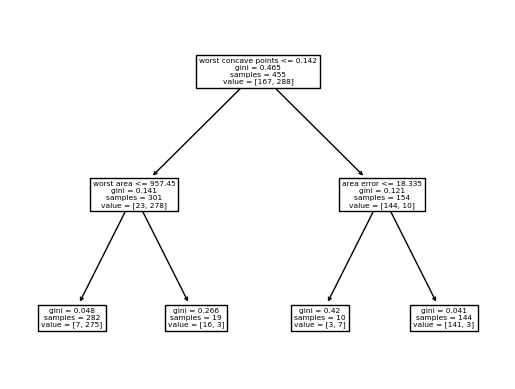

In [28]:
from sklearn.tree import plot_tree
plot_tree(sk_cfl_tree, feature_names=X_train.columns);

In [29]:
# Filter for leaf nodes 
[[node.id, node] for node in clf_tree.node_list if node.is_leaf_node()==True]

[[2, <DecisionTree.Node at 0x12fc1f700>],
 [3, <DecisionTree.Node at 0x12fc1f6a0>],
 [4, <DecisionTree.Node at 0x12fc1f730>]]

In [30]:
acc = accuracy(y_test, predictions1)
acc

0.9210526315789473

In [31]:
for i in clf_tree.node_list:
    print(i.id, i.depth, i.samples, i.is_leaf_node(), i.value)

0 0 455 False 1
1 1 301 False 1
2 2 282 True 1
3 2 19 True 0
4 1 154 True 0


In [32]:
# Train DecisionTree from scratch
reg_tree = DecisionTree(max_depth=3, treetype="regression")
reg_tree.fit(X_train, y_train)

# Predict
predictions = reg_tree.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
mean_squared_error(y_test, predictions)

0.09527350882662337

In [35]:
for i in reg_tree.node_list:
    print(i.id, i.is_leaf_node(), i.depth, i.value)

0 False 0 0.6329670329670329
1 False 1 0.9235880398671097
2 False 2 0.975177304964539
3 True 3 0.9786476868327402
4 True 3 0.0
5 False 2 0.15789473684210525
6 True 3 0.75
7 True 3 0.0
8 False 1 0.06493506493506493
9 False 2 0.7
10 True 3 1.0
11 True 3 0.0
12 False 2 0.020833333333333332
13 True 3 1.0
14 True 3 0.007042253521126761


# Comparison Dingyi vs. my_code

In [58]:
import pyreadr
from os import path

In [59]:
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/ExplainableAI/RF_from_scratch/utils")

In [60]:
#Import Random Forest from scratch functions
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/utils")

#tree functions
from helper_function import check_purity, check_purity, classify_data, split_data, calculate_impurity, calculate_overall_impurity, determine_best_split, split_in_loop, get_potential_splits, create_leaf, determine_type_of_feature, decision_tree_algorithm, predict_example, decision_tree_predictions

#RF functions
from helper_function import _generate_sample_indices, _generate_unsampled_indices, random_forest_algorithm_oob, random_forest_predictions

#Test/metrics functions?

from helper_function import generate_mse_fi, generate_mse_sklearn, easy_for_test, num_leaf_sklearn

In [62]:
# Read data
data = pyreadr.read_r(os.path.join(os.path.dirname(os.path.dirname(Path.cwd())),'ExplainableAI/ConferenceSubmission/Data/SRData.RData')) # regression


X0 = data['boston'][0:50]
X1 = X0.select_dtypes(include=np.number).iloc[:,:-1] # numerical features exclude the last column (y)
if len(X0.select_dtypes(include='category').columns) !=0: # recognize categorical feature
    X2 = pd.get_dummies(X0[(X0.select_dtypes(include='category')).columns], drop_first=True) # change it into one_hot_encoding
else: X2 = pd.DataFrame()

X = pd.concat(objs=[X2, X1], axis=1) # combine dummies and numerical features
y = data['boston'].iloc[0:50,-1] # the last column is y

AttributeError: module 'posixpath' has no attribute 'cwd'

In [155]:
np.mean(y)

20.502000000000002

In [175]:
# Fit regression model sklearn
regr_1 = DecisionTreeRegressor(max_depth=2, random_state=42)
regr_1.fit(X, y)

# Predict
mse_sklearn = mean_squared_error(y, regr_1.predict(X))
print(mse_sklearn)

6.605693862433863


[Text(0.5, 0.8333333333333334, 'X[12] <= 6.195\nsquared_error = 35.567\nsamples = 50\nvalue = 20.502'),
 Text(0.25, 0.5, 'X[5] <= 6.884\nsquared_error = 18.414\nsamples = 9\nvalue = 30.511'),
 Text(0.125, 0.16666666666666666, 'squared_error = 5.87\nsamples = 5\nvalue = 27.08'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.985\nsamples = 4\nvalue = 34.8'),
 Text(0.75, 0.5, 'X[0] <= 0.2\nsquared_error = 12.514\nsamples = 41\nvalue = 18.305'),
 Text(0.625, 0.16666666666666666, 'squared_error = 5.986\nsamples = 14\nvalue = 21.493'),
 Text(0.875, 0.16666666666666666, 'squared_error = 7.896\nsamples = 27\nvalue = 16.652')]

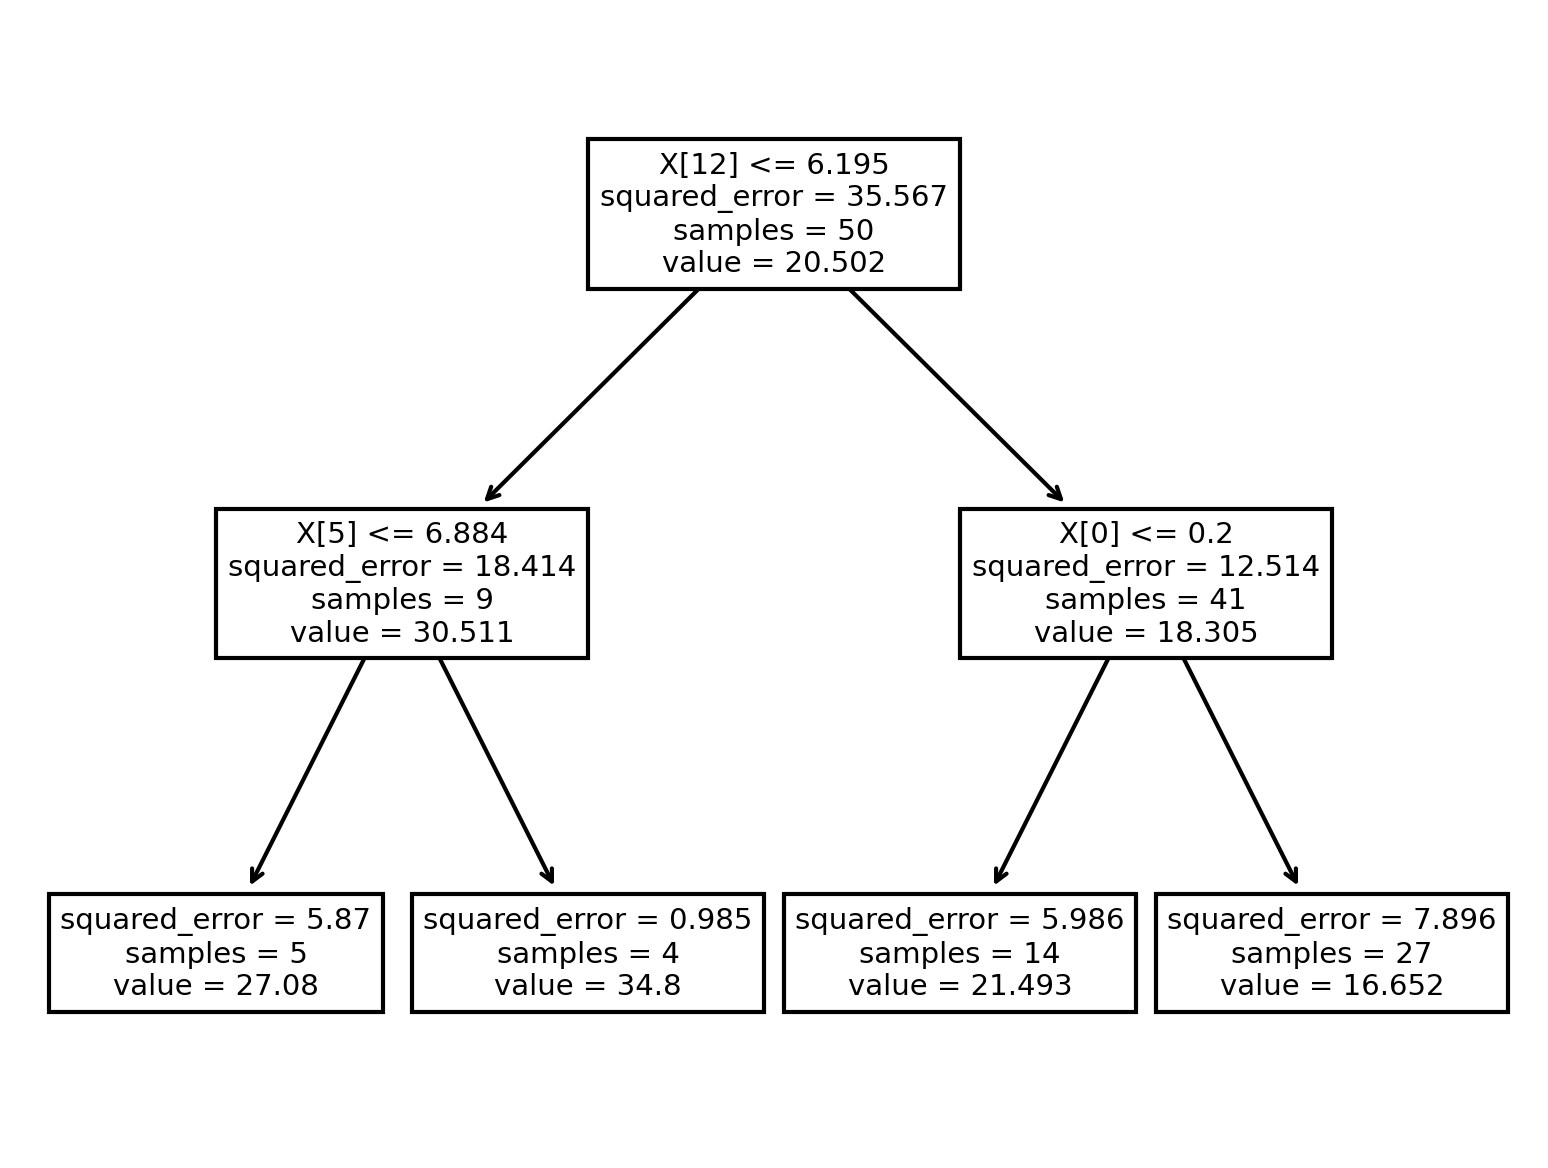

In [192]:
plot_tree(regr_1)

In [174]:
# Fit Tree with self-made code

sub_tree, feature_gain, y_above_list = decision_tree_algorithm(X, y, max_depth=2, n=len(y), random_state=42)# 
y_2 = decision_tree_predictions(X, sub_tree)

mse_from_scratch = mean_squared_error(y, y_2)
print(mse_from_scratch)

8.116444008152804


In [158]:
# What is sub_tree ? 
print(sub_tree)

{'lstat <= 6.195 with num of samples 50 and current y 20.502000000000002 and above y {0: [0, 50, 20.502000000000002]}': [{'rm <= 6.884 with num of samples 9 and current y 30.511111111111113 and above y {0: [0, 50, 20.502000000000002], 1: [1, 9, 30.511111111111113]}': [27.217662768031193, 30.87450487329435]}, {'crim <= 0.1998 with num of samples 41 and current y 18.304878048780488 and above y {0: [0, 50, 20.502000000000002], 1: [1, 9, 30.511111111111113], 2: [2, 5, 27.217662768031193], 3: [2, 4, 30.87450487329435], 4: [1, 41, 18.304878048780488]}': [21.23395019471203, 17.34216162743327]}]}


In [159]:
# What is feature gain?
feature_gain

[[0, 'lstat', 0.7598857959183718],
 [0, 'rm', -1.1247666666666674],
 -1,
 -1,
 [0, 'crim', 0.29531000000000174],
 -1,
 -1]

In [160]:
# What is y above list ? 
y_above_list

{0: [0, 50, 20.502000000000002],
 1: [1, 9, 30.511111111111113],
 2: [2, 5, 27.217662768031193],
 3: [2, 4, 30.87450487329435],
 4: [1, 41, 18.304878048780488],
 5: [2, 14, 21.23395019471203],
 6: [2, 27, 17.34216162743327]}

In [161]:
t = X.values.copy()

In [162]:
isinstance(X, pd.DataFrame)

True

In [163]:
X.columns[12]

'lstat'

In [69]:
X, y = datasets.load_boston(return_X_y=True)

In [78]:
# Train DecisionTree from scratch
reg_treee = DecisionTree(max_depth=2, treetype="regression", random_state=42)
reg_treee.fit(X, y)

# Predict
predictions = reg_treee.predict(X)

In [79]:
from sklearn.metrics import mean_squared_error

In [80]:
mean_squared_error(y, predictions)

25.69946745212606

In [76]:
for i in reg_treee.node_list:
    print(i.id, i.depth, i.samples, i.is_leaf_node(), i.value, i.feature_name, i.threshold)

0 0 506 False 22.532806324110677 None 6.941
1 1 430 False 19.933720930232557 None 14.399999999999999
2 2 255 True 23.347004376124353 None None
3 2 175 True 14.972675637668418 None None
4 1 76 False 37.238157894736844 None 7.436999999999999
5 2 46 True 32.15059876754121 None None
6 2 30 True 44.9656034729807 None None


In [82]:
reg_treee.decision_paths

[(0, 1, 2), (0, 1, 3), (0, 4, 5), (0, 4, 6)]

In [81]:
reg_treee.node_id_dict

{0: {'node': <DecisionTree.Node at 0x12a7b6650>,
  'id': 0,
  'depth': 0,
  'feature': 5,
  'is_leaf_node': False,
  'threshold': 6.941,
  'gini': 84.41955615616556,
  'samples': 506,
  'value': 22.532806324110677},
 1: {'node': <DecisionTree.Node at 0x12a7b6bc0>,
  'id': 1,
  'depth': 1,
  'feature': 12,
  'is_leaf_node': False,
  'threshold': 14.399999999999999,
  'gini': 40.2728396430503,
  'samples': 430,
  'value': 19.933720930232557},
 2: {'node': <DecisionTree.Node at 0x12a7b64a0>,
  'id': 2,
  'depth': 2,
  'feature': None,
  'is_leaf_node': True,
  'threshold': None,
  'gini': 26.008696039984624,
  'samples': 255,
  'value': 23.349803921568625},
 3: {'node': <DecisionTree.Node at 0x12a7b72e0>,
  'id': 3,
  'depth': 2,
  'feature': None,
  'is_leaf_node': True,
  'threshold': None,
  'gini': 19.27572114285714,
  'samples': 175,
  'value': 14.956000000000001},
 4: {'node': <DecisionTree.Node at 0x12a7b4c10>,
  'id': 4,
  'depth': 1,
  'feature': 5,
  'is_leaf_node': False,
  'th

In [77]:
reg_treee.node_id_dict

{0: {'node': <DecisionTree.Node at 0x12a7b4d90>,
  'id': 0,
  'depth': 0,
  'feature': 5,
  'is_leaf_node': False,
  'threshold': 6.941,
  'gini': 84.41955615616556,
  'samples': 506,
  'value': 22.532806324110677},
 1: {'node': <DecisionTree.Node at 0x12a7b6f50>,
  'id': 1,
  'depth': 1,
  'feature': 12,
  'is_leaf_node': False,
  'threshold': 14.399999999999999,
  'gini': 40.2728396430503,
  'samples': 430,
  'value': 19.933720930232557},
 2: {'node': <DecisionTree.Node at 0x12a7b4940>,
  'id': 2,
  'depth': 2,
  'feature': None,
  'is_leaf_node': True,
  'threshold': None,
  'gini': 26.008696039984624,
  'samples': 255,
  'value': 23.347004376124353},
 3: {'node': <DecisionTree.Node at 0x12a7b74f0>,
  'id': 3,
  'depth': 2,
  'feature': None,
  'is_leaf_node': True,
  'threshold': None,
  'gini': 19.27572114285714,
  'samples': 175,
  'value': 14.972675637668418},
 4: {'node': <DecisionTree.Node at 0x12a7b6740>,
  'id': 4,
  'depth': 1,
  'feature': 5,
  'is_leaf_node': False,
  'th

# RandomForest from Scratch

In [83]:
# Train RandomForest from scratch
rf = RandomForest(n_trees=3, treetype="regression", random_state=42, HS_lambda=10, HShrinkage=True)
rf.fit(X_train, y_train)

/Users/philippheitmann/code/Heity94/SelectiveHierarchicalShrinkage/TreeModelsFromScratch/RandomForest.py:95: UserWarning: 116 out of 455 samples do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates. These samples were dropped before computing the oob_score
  warn(message)


In [84]:
print(rf.treetype)
rf.oob_score

regression


0.2625106325202247

In [85]:
predictions = rf.predict(X_test)

In [88]:
mean_squared_error(y_test, predictions, squared=False)

0.268560526390761

In [87]:
mean_squared_error(y_test, predictions, squared=False)

0.268560526390761

In [854]:
# Train RandomForest from scratch
rf = RandomForest(n_trees=10, treetype="classification")
rf.fit(X_train, y_train)

/Users/philippheitmann/code/Heity94/TreeModelsFromScratch/RandomForest.py:80: UserWarning: 6 out of 455 samples do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates. These samples were dropped before computing the oob_score
  mask[nan_indxs] = False


In [855]:
print(rf.treetype)
rf.oob_score

classification


0.9398663697104677

In [856]:
predictions = rf.predict(X_test)

In [857]:
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0])

In [805]:
accuracy_score(y_test, predictions)

0.9298245614035088